<a href="https://colab.research.google.com/github/jsroa15/Deep_Learning/blob/main/Intro_Deep_Learning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

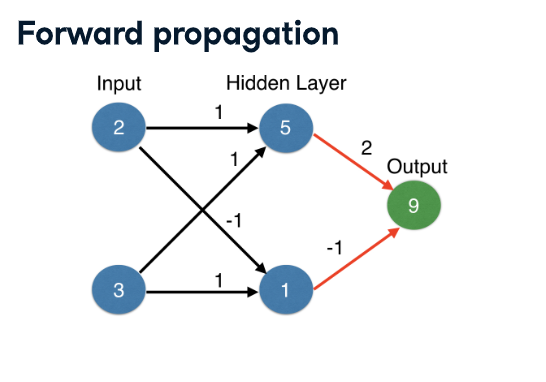